# Lab Program 1
## Implement and demonstratetheFIND-Salgorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file and show the output for test cases. Develop an interactive program by Compareing the result by implementing LIST THEN ELIMINATE algorithm.

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('Prog1&2_FindS_CandidateElimination.csv')
def list_then_eliminate(concepts, target):
    positive_examples = concepts[target == 'Yes']
    specific_hypothesis = positive_examples[0].copy()
    for example in positive_examples[1:]:
        for i, attribute in enumerate(example):
            if attribute != specific_hypothesis[i]:
                specific_hypothesis[i] = '?'
    return specific_hypothesis
def train(concepts, target):
    for i, val in enumerate(target):
        if val == "Yes":
            specific_h = concepts[i]
            break
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] == specific_h[x]:
                    pass
                else:
                    specific_h[x] = "?"
    return specific_h
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
print('Specific hypothesis obtained by LIST THEN ELIMINATE algorithm:')
print(list_then_eliminate(concepts, target))
print('\nSpecific hypothesis obtained by the original code:')
print(train(concepts, target))

Specific hypothesis obtained by LIST THEN ELIMINATE algorithm:
['Sunny' 'Warm' '?' 'Strong' '?' '?']

Specific hypothesis obtained by the original code:
['Sunny' 'Warm' '?' 'Strong' '?' '?']


# Lab Program 2
## For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Eliminationalgorithm. Output a description of the set of all hypotheses consistent with the training examples

In [1]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('Prog1&2_FindS_CandidateElimination.csv'))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i,val in enumerate(general_h) if val == ['?','?','?','?','?','?']]
    for i in indices:
        general_h.remove(['?','?','?','?','?','?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")
data.head()

Final S:
['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final G:
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


,Sky,Airtemp,Humidity,Wind,Water,Forecast,WaterSport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Cloudy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


# Lab Program 3
## Demonstrate Pre processing (Data Cleaning, Integration and Transformation) activity on suitable data:
### For example:
### Identify and Delete Rows that Contain Duplicate Data by considering an appropriate dataset.
### Identify and Delete Columns That Contain a Single Value by considering an appropriate dataset.

In [2]:
import pandas as pd
data1 = {'A': [1, 2, 2, 3, 4, 5, 5],
         'B': [5, 6, 6, 7, 8, 9, 9]}
data2 = {'C': [10, 10, 10, 10, 10],
         'D': [11, 12, 13, 14, 15]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print("Before removing duplicates in dataset 1:")
print(df1)
df1.drop_duplicates(inplace=True)
print("\nAfter removing duplicates in dataset 1:")
print(df1)
print("\nBefore removing single value columns in dataset 2:")
print(df2)
cols_to_remove = [col for col in df2.columns if df2[col].nunique() <= 1]
df2.drop(cols_to_remove, axis=1, inplace=True)
print("\nAfter removing single value columns in dataset 2:")
print(df2)

Before removing duplicates in dataset 1:
   A  B
0  1  5
1  2  6
2  2  6
3  3  7
4  4  8
5  5  9
6  5  9

After removing duplicates in dataset 1:
   A  B
0  1  5
1  2  6
3  3  7
4  4  8
5  5  9

Before removing single value columns in dataset 2:
    C   D
0  10  11
1  10  12
2  10  13
3  10  14
4  10  15

After removing single value columns in dataset 2:
    D
0  11
1  12
2  13
3  14
4  15


# Lab Program 4
## Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge toclassify a new sample.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
data = pd.read_csv("Prog4_ID3.csv")
X = data.drop('Play', axis=1)
y = data['Play']
X = pd.get_dummies(X)
y = y.map({'yes': 1, 'no': 0})
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X, y)
export_graphviz(classifier, out_file='tree.dot', feature_names=X.columns)
with open('tree.dot', 'r') as file:
    tree_data = file.read()
print(tree_data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Outlook_overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="Humidity_high <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Windy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="Outlook_rainy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="Outlook_rainy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="entropy = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 8 ;
9 [label="Windy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 10 ;
11 [label="entro

# Lab Program 5
## Demonstrate the working of the Random forest algorithm. Use an appropriate data set for building and apply this knowledge toclassify a new sample.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
new_sample = [[3, 5, 4, 2]]
new_pred = clf.predict(new_sample)
print("Predicted class of new sample: ", new_pred)

Accuracy: 1.0
Predicted class of new sample:  [1]


# Lab Program 6
## Implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [4]:
# test_data should contain all possible outputs values that can be given to any attribute
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def gaussian_naive_bayes(data, test_data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X = pd.get_dummies(X)
    nb = GaussianNB()
    nb.fit(X, y)
    y_pred_new = nb.predict(pd.get_dummies(test_data.iloc[:, :-1]))
    accuracy_new = accuracy_score(test_data.iloc[:, -1], y_pred_new)
    print("Accuracy on Test data set:", accuracy_new)

data = pd.read_csv("Prog6_train_data.csv")
test_data = pd.read_csv("Prog6_test_data.csv")
gaussian_naive_bayes(data, test_data)

Accuracy on Test data set: 1.0


# Lab Program 7
## Assuming a set of documents that need to be classified, use the naive Bayesian Classifier model to perform this task. Calculate the accuracy, precision, and recall for your data set.

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7728359001593202
Precision: 0.7616683207318354
Recall: 0.7728359001593202


# Lab Program 8
## Construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. 

In [2]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
data = pd.read_csv('Prog8_Bayesian_network.csv')
model = BayesianNetwork()
model.add_edges_from([('age', 'heartDisease'), 
                      ('sex', 'heartDisease'), 
                      ('cp', 'heartDisease'), 
                      ('trestbps', 'heartDisease'), 
                      ('chol', 'heartDisease')])
model.fit(data, estimator=MaximumLikelihoodEstimator)
age = input("Enter age (SeniorCitizen/Teen/Youth/MiddleAged): ")
sex = input("Enter sex (Male/Female): ")
cp = input("Enter chest pain type (Typical angina/Atypical angina/Non-anginal pain): ")
trestbps = input("Enter resting blood pressure (High/Normal/Low): ")
chol = input("Enter cholesterol level (High/Normal/Low): ")
user_data = pd.DataFrame({'age': [age], 'sex': [sex], 'cp': [cp], 'trestbps': [trestbps], 'chol': [chol]})
prediction =  model.predict(user_data)
print("Prediction:", prediction)

Enter age (SeniorCitizen/Teen/Youth/MiddleAged): Teen
Enter sex (Male/Female): Female
Enter chest pain type (Typical angina/Atypical angina/Non-anginal pain): 
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Non-anginal pain
Enter resting blood pressure (High/Normal/Low): Normal
Enter cholesterol level (High/Normal/Low): Normal


  0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   heartDisease
0           No


# Lab Program 9
## Demonstrate the working of EM algorithm to cluster a set of data stored in a .CSV file. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
data = pd.read_csv('Prog9_EM.csv')
X = data.values
num_clusters = 3
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(X)
labels = gmm.predict(X)
print('Cluster Labels:')
print(labels)

Cluster Labels:
[1 1 2 1 2 2 0]


C:\Users\kruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Lab Program 10
## Demonstrate the working of SVM classifier for a suitable data set

Accuracy: 0.956140350877193
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



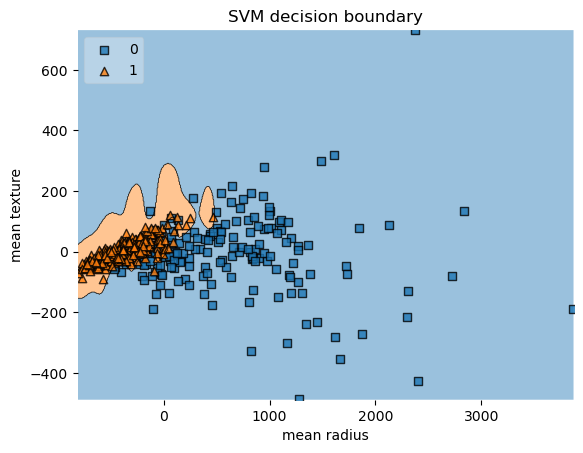

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)

plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('SVM decision boundary')
plt.show()

In [4]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 303.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
